### Background & Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.     
A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.     
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.     
The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.      

### Objective
To predict which customer is more likely to purchase the newly introduced travel package.


### Topics Index

- <a href = #link1>Import Python libraries and acquire the data set</a>
- <a href = #link2> Basic EDA (Exploratory Data Analysis)</a>
- <a href = #link3> EDA - Univariable analysis</a>
- <a href = #link4> EDA - Bivariate and Multivariate Analysis </a>
- <a href = #link5> Data preprocessing   </a>
- <a href = #link6> Model building - preparations  </a>
- <a href = #link7> Model building - Bagging </a>
- <a href = #link8> Model performance improvement - Bagging </a>
- <a href = #link9> Model building - Boosting </a>
- <a href = #link10> Model performance improvement - Boosting  </a>
- <a href = #link11> Conclusions and wrap up </a>
 
 

### <a name='link1'> Import Python libraries and acquire the data set </a>

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization and better presentation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Libraries for splitting data, imputing missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries for tunning the model, get different metric scores, and statistics 
import scipy.stats as stats
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Libraries for importing decision tree, logistic regression, tree classifier, and different ensemble classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier



In [2]:
# Data acquisition 
tour = pd.read_csv ('Tourism.csv')

### <a name='link2'> Basic EDA (Exploratory Data Analysis)</a>

In [3]:
# Check number of records and columns 
tour.shape 

(4888, 20)

In [4]:
np.random.seed(1)  # To get the same random results 
tour.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [5]:
# Check the data types and number of null values 
tour.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
# looking at which columns have the most missing values
tour.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

In [7]:
# Count for unique values 
tour.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

**Observations**

- We will need to impute values later or drop problematic records

In [8]:
# Basic summary stats - numeric variables
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations**

- CustomerID is not a valuable variable, we should drop it later
- Mean and the average age is ~36-38 years old
- Mean and average number of trips is around 3
- Mean and average duration of the pitch is ~13 to ~16 min
- Mean and average number of persons visiting is approximate ~3
- Mean and average number of children visiting is approximately 1 
- Mean and average monthly income is ~22K to ~24K
- But let perform univariable and multivariable analysis for more detailed insights


### <a name='link3'> EDA - Univariable analysis </a>

In [9]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

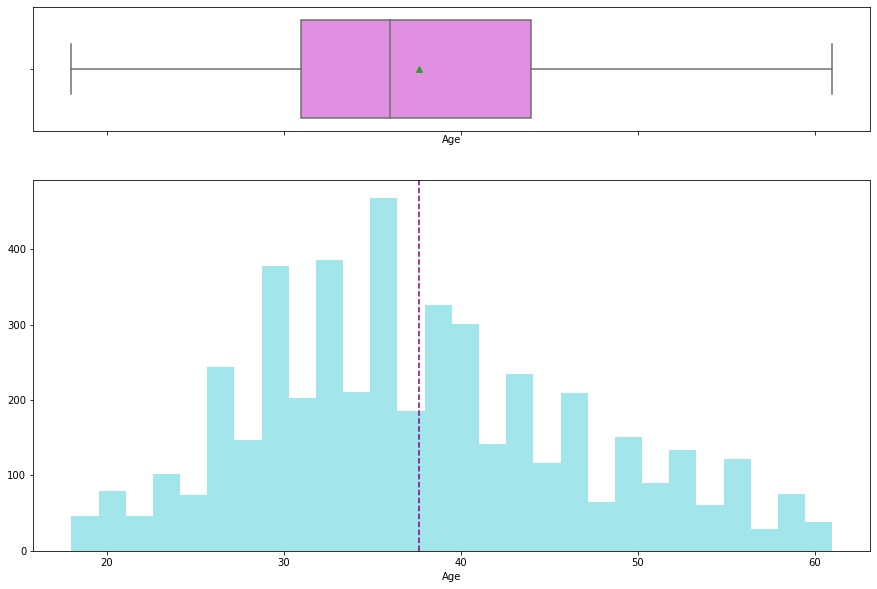

In [10]:
histogram_boxplot(tour.Age)

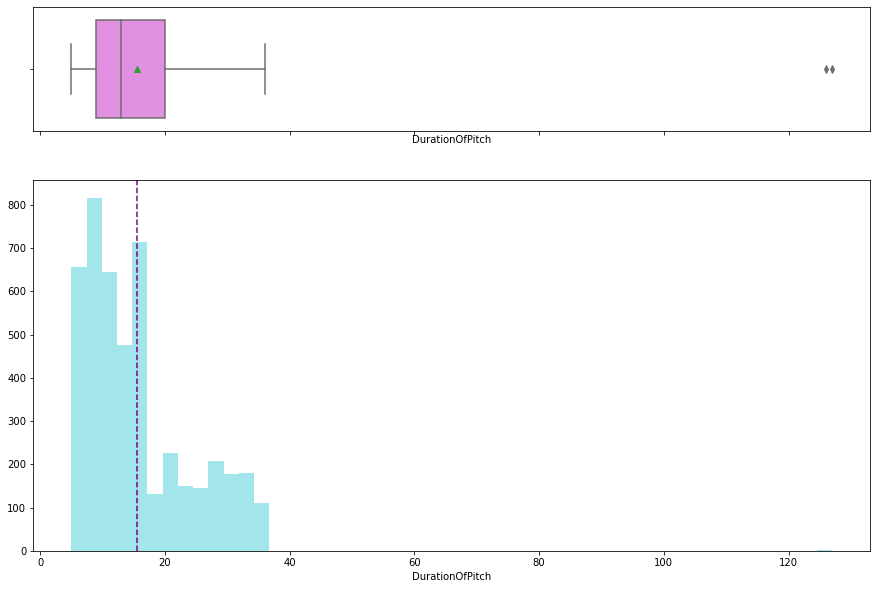

In [11]:
histogram_boxplot(tour.DurationOfPitch)

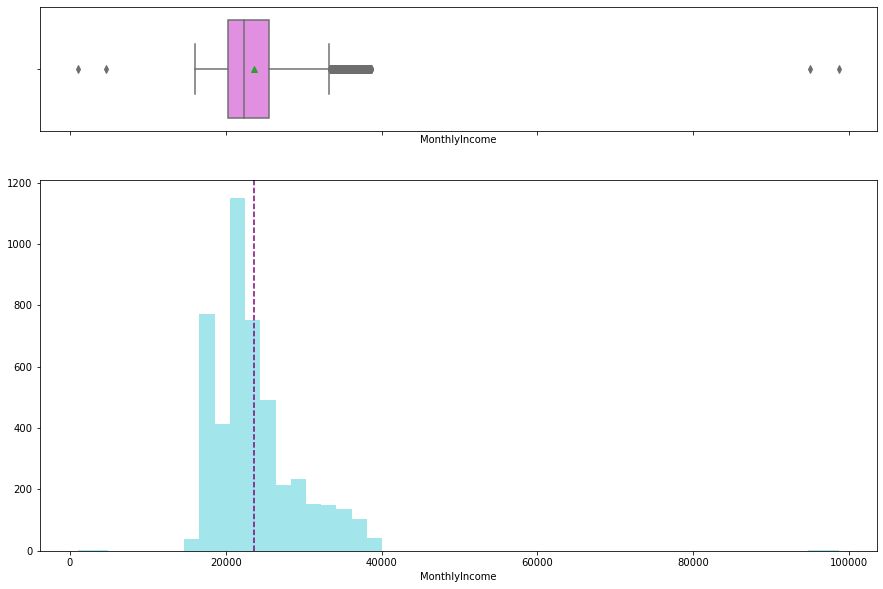

In [12]:
histogram_boxplot(tour.MonthlyIncome)

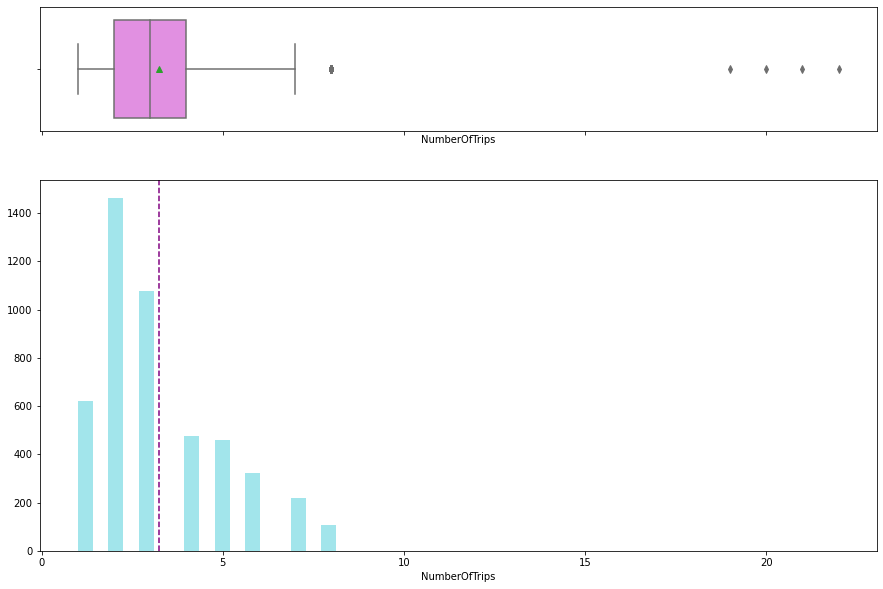

In [13]:
histogram_boxplot(tour.NumberOfTrips)

**Observations**

- Age is distributed around the age of ~37 years old
- Monthly income (mean ~23600) and duration of the pitch (mean ~15 min) are slightly right-skewed with some outliers  
- Number of trips is more right-skewed and the number of outliers, the mean a little higher than 3




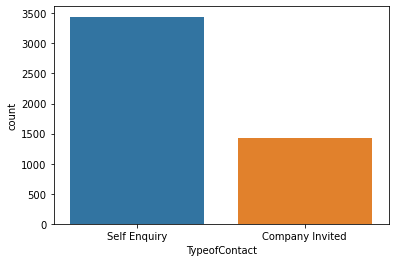

In [14]:
# Let look into the type of contact
sns.countplot (data = tour, x='TypeofContact'  );
plt.show ()

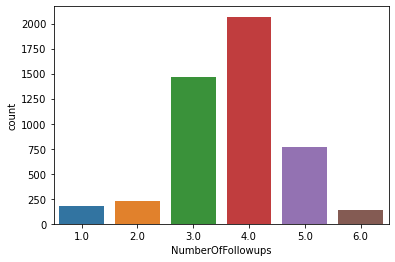

In [15]:
# Let look into the number of follow ups
sns.countplot (data = tour, x='NumberOfFollowups'  );
plt.show ()

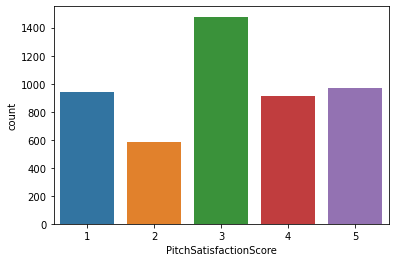

In [16]:
# Let look into the pitch satisfaction score
sns.countplot (data = tour, x='PitchSatisfactionScore'  );
plt.show ()

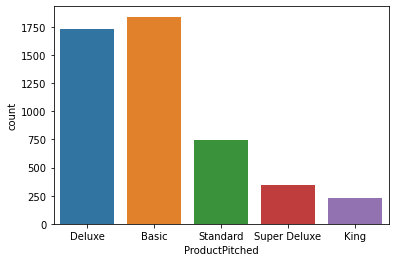

In [17]:
# Let look into the product pitched 
sns.countplot (data = tour, x='ProductPitched'  );
plt.show ()

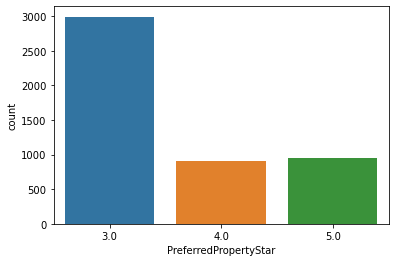

In [18]:
# Let look into the property preferred star
sns.countplot (data = tour, x='PreferredPropertyStar'  );
plt.show ()

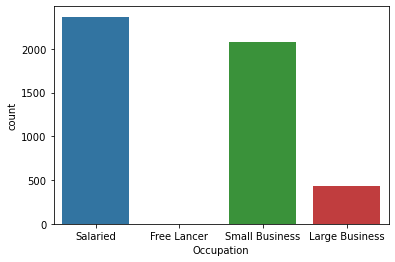

In [19]:
# Let look into occupation
sns.countplot (data = tour, x='Occupation'  );
plt.show ()

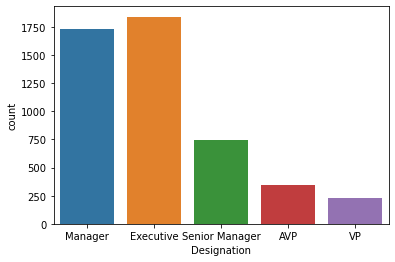

In [20]:
# Let look into the designation
sns.countplot (data = tour, x='Designation'  );
plt.show ()

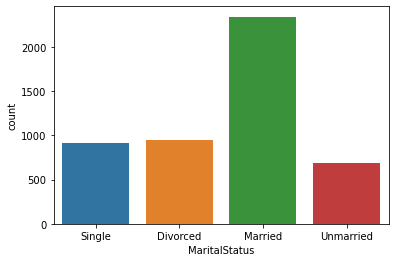

In [21]:
# Let look into the marital status
sns.countplot (data = tour, x='MaritalStatus'  );
plt.show ()

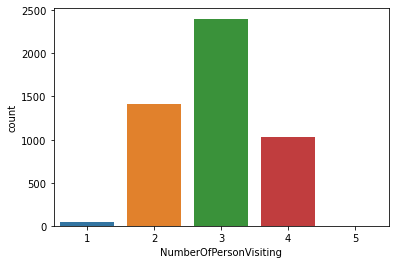

In [22]:
# Let look into the number of persons visiting
sns.countplot (data = tour, x='NumberOfPersonVisiting'  );
plt.show ()

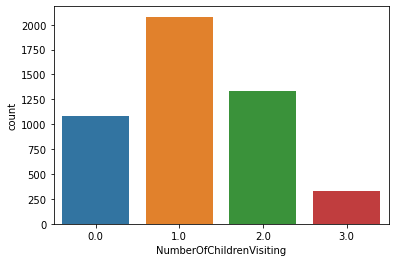

In [23]:
# Let look into the number of children visiting 
sns.countplot (data = tour, x='NumberOfChildrenVisiting'  );
plt.show ()

In [24]:
# function to create labeled barplots, it's a fancier function


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

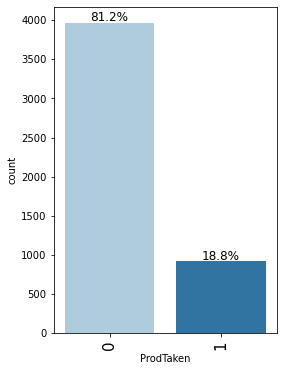

In [25]:
labeled_barplot(tour, "ProdTaken", perc=True)

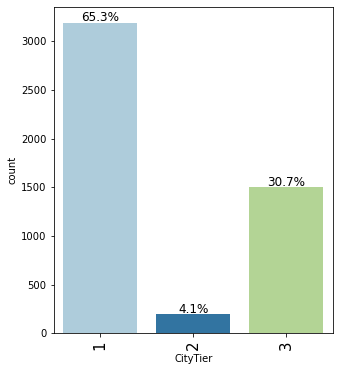

In [26]:
labeled_barplot(tour, "CityTier", perc=True)

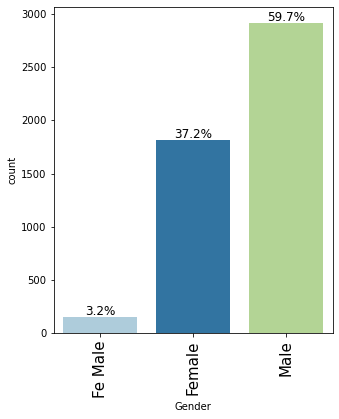

In [27]:
labeled_barplot(tour, "Gender", perc=True)

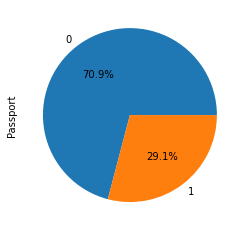

In [28]:
# Count number customers and % having passport

ms_count = tour.groupby("Passport")["Passport"].count()
ms_count
ms_count.plot.pie(autopct="%.1f%%");

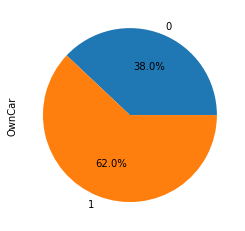

In [29]:
# Count number customers and % having a car

ms_count = tour.groupby("OwnCar")["OwnCar"].count()
ms_count
ms_count.plot.pie(autopct="%.1f%%");

**Observations**

- At least 2/3 of the customers contacted based on Self Inquiry     
- And as well we can identify several follow up calls, the Pareto being 3, 4 and 5    
- Pitch satisfaction was normally distributed with the mean 3 being the most common result    
- Regarding the type of products pitched; more than half were Deluxe and Basic with only a few in the high end: super deluxe and king    
- Most of the customers prefer a 3-star hotel vs. 4 or 5    
- Only ~19% buy the packages offered by the travel company     
Regarding demographics:   
- The majority are salaried or having small businesses being managers or having some type of executive role   
- Married is by far the more common marital status, with the rest having similar frequency    
- Regarding the number of persons traveling, in most of the cases, it's 3 persons with 1 child     
- 2/3 of the customers are from Tier 1 cities     
- Gender, female accounts for ~40% of the customers, we need to take care of error data entries with females    
- Approximately ~30% are telling they have a passport, and ~62% own a car   



### <a name='link4'> EDA - Bivariate and Multivariate Analysis </a>

To proceed with further analysis, we will try to possible correlation recognitions

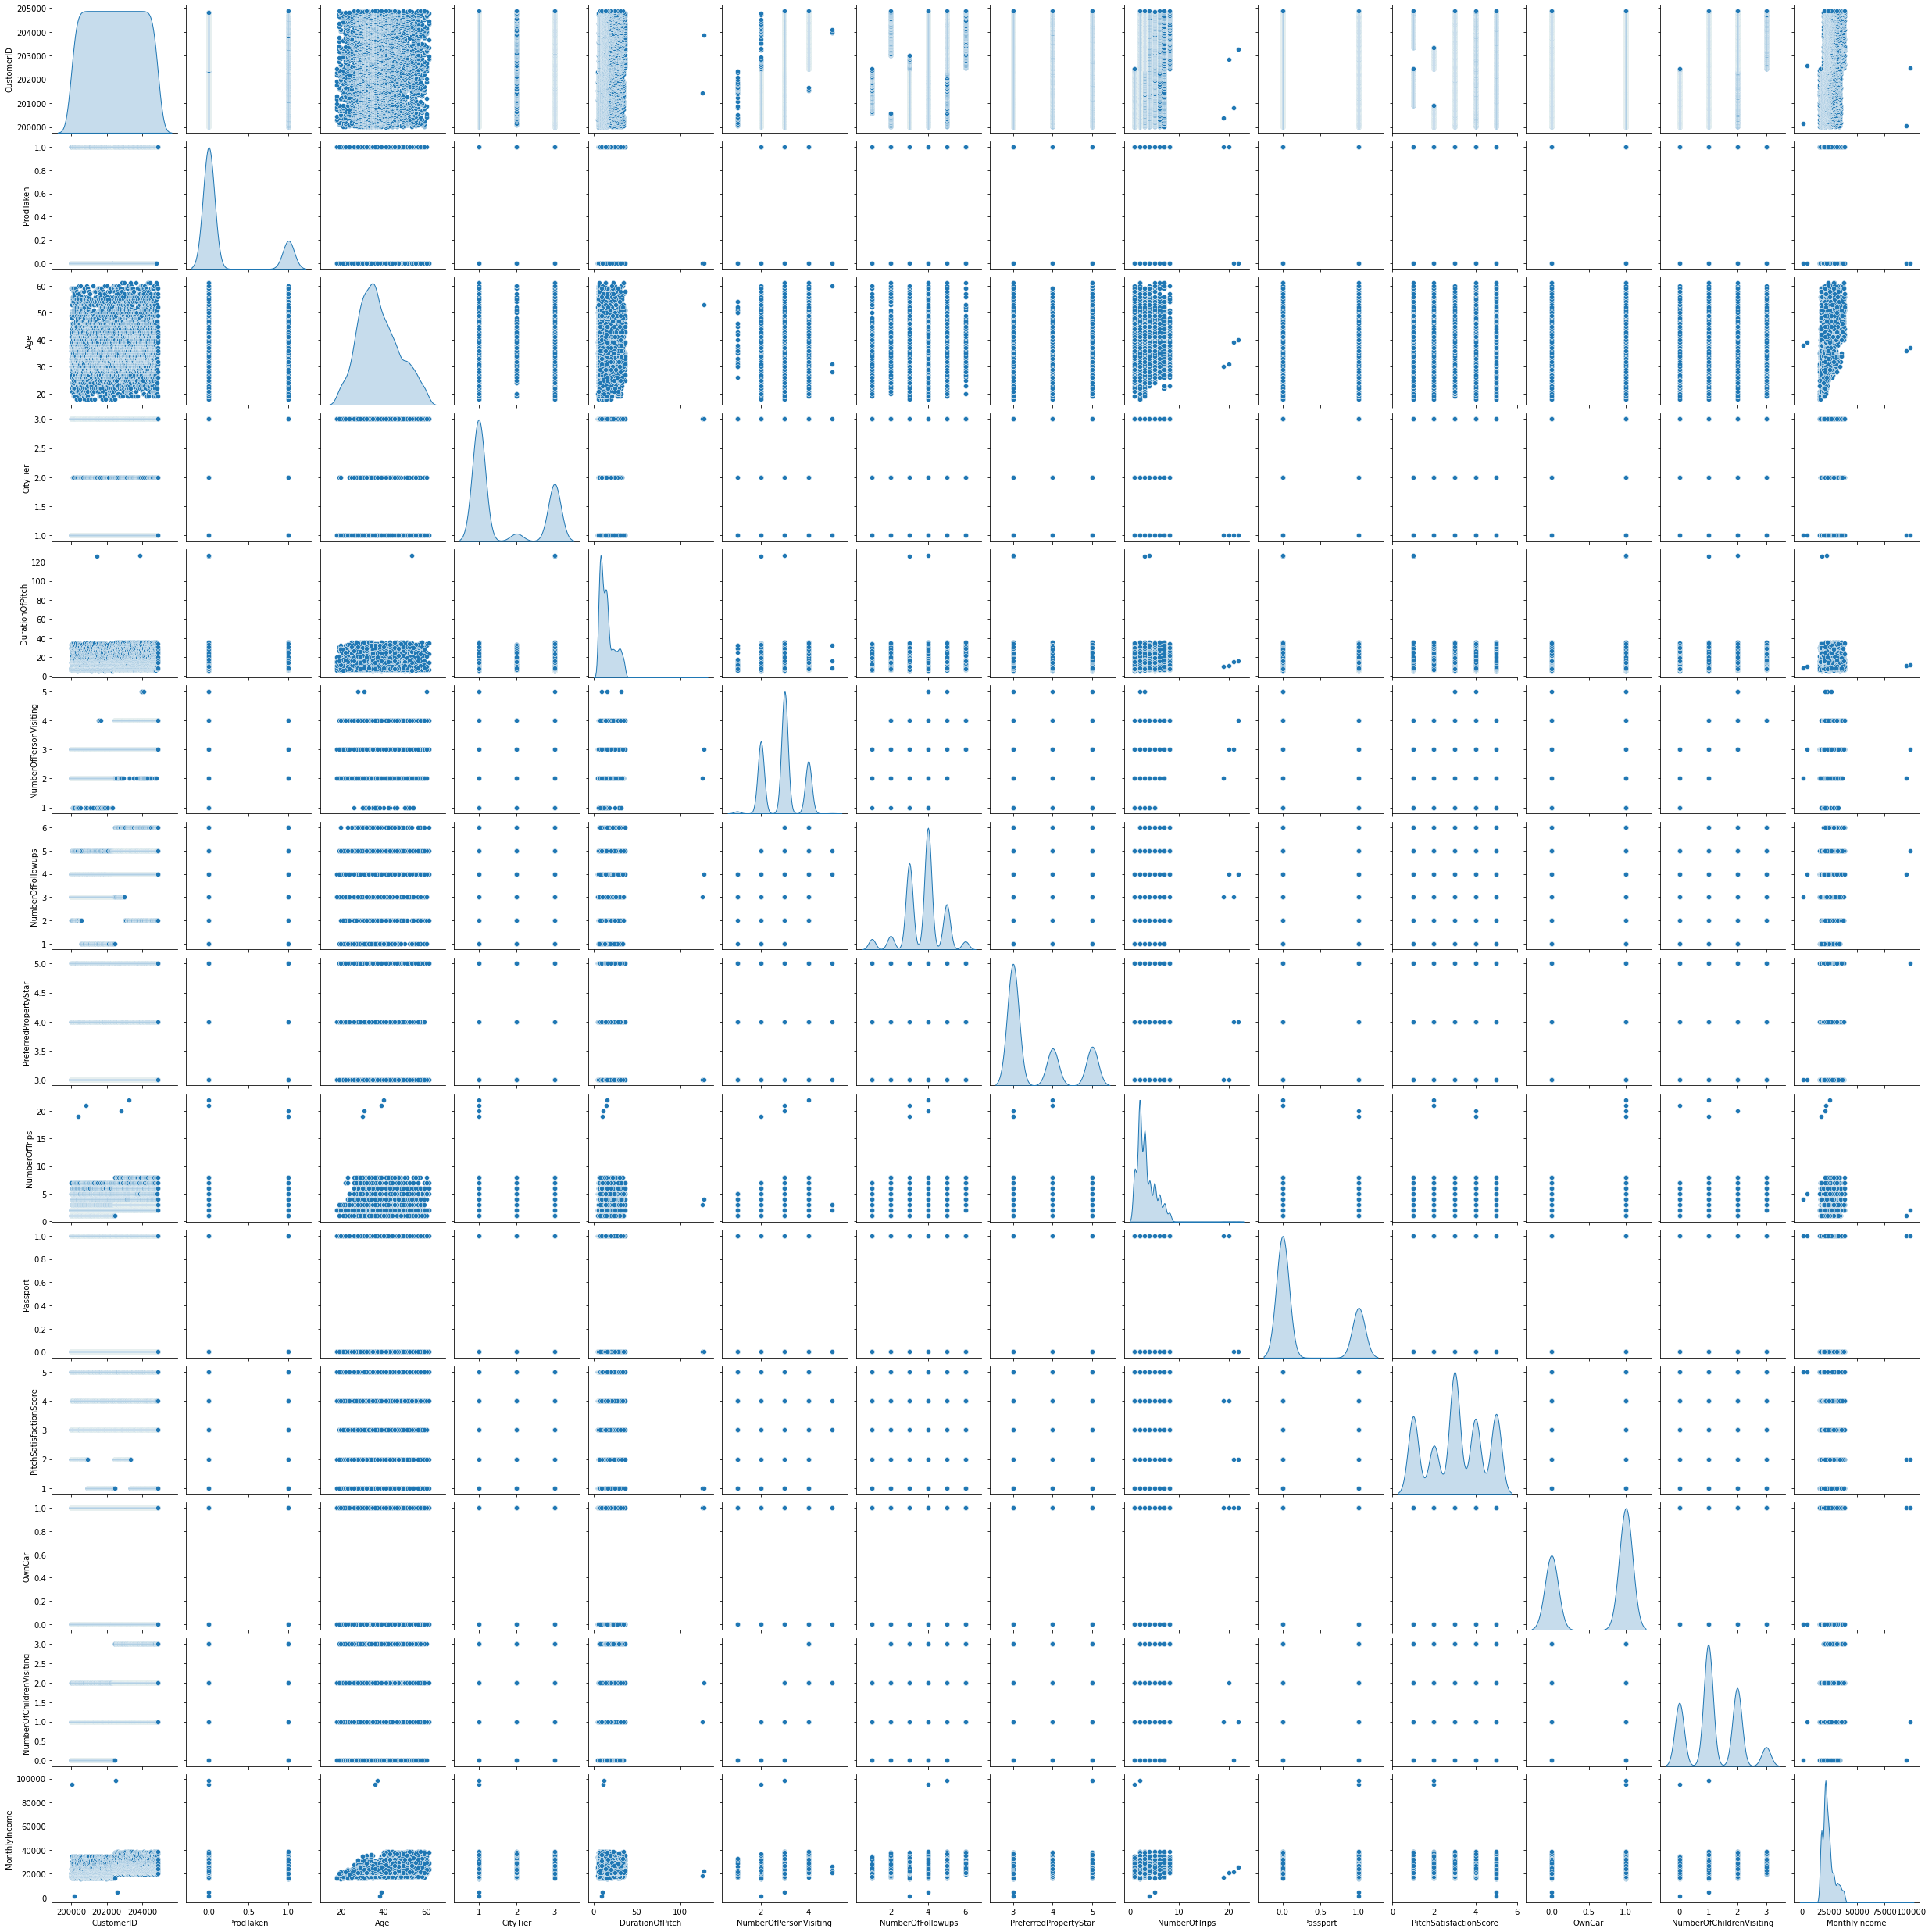

In [30]:
# Create plots for possible correlation recognitions
sns.pairplot(tour,diag_kind='kde')

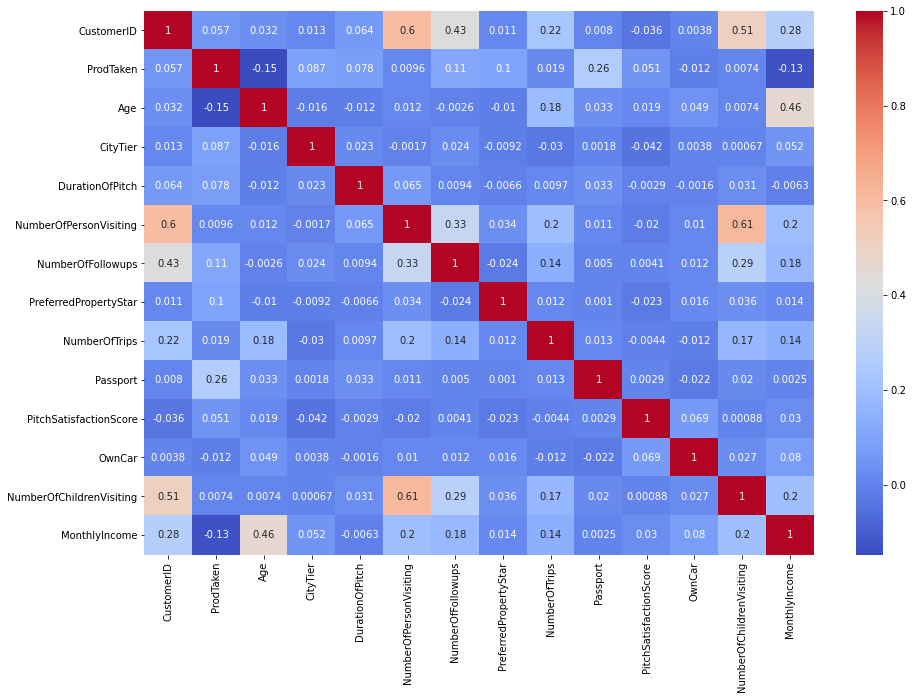

In [31]:
# Create a heatmap for correlation analysis
plt.figure(figsize=(15, 10))
sns.heatmap(tour.corr(), annot=True, cmap="coolwarm")


**Correlations Observations**

- The number of persons and children visiting are correlated 61%, and it makes sense    
- Income and age are correlated by 46%    
- The number of calls is correlated 33% with the number of persons visiting and the number of children visiting 29%   
- Product bought, and passport have a 26% correlation    
- The number of persons visiting and monthly income correlates 20%    
- The rest of the correlations are less than 20%, they are not very interesting   
- All the negative correlations are very small with product bought and Monthly income -13% and age -15% being the highest ones. The rest are very low w/o significance



In [32]:
# Let fix the Gender name by replacing before performing further EDA with this variable
tour["Gender"] = tour["Gender"].str.replace("Fe Male", "Female")

<Figure size 720x2880 with 0 Axes>

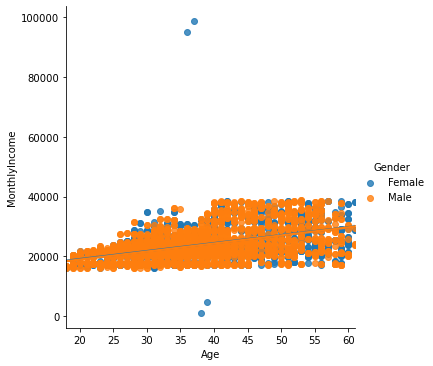

In [33]:
# Check Income and Age age correlation in the context of gender

plt.figure(figsize=(10, 40))
 

sns.lmplot (data= tour , y="MonthlyIncome", x="Age", hue="Gender" , fit_reg =True);
plt.show()

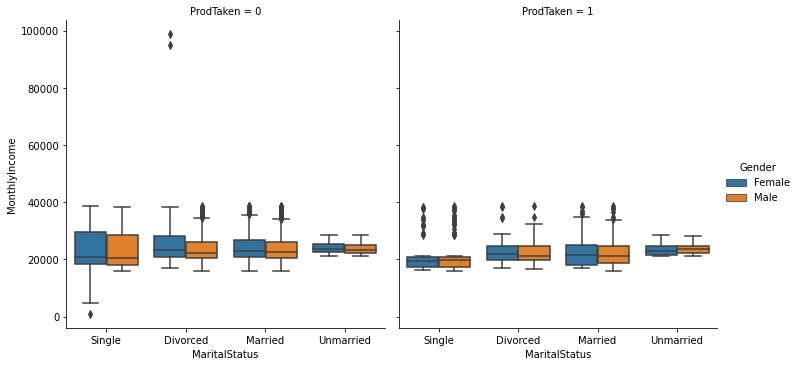

In [34]:
# Checking deeper the demographics of the customer base
# Look for a clue about segmentation and relationships 
# Does it impact the puchasing ?

sns.catplot(x="MaritalStatus",
               y = "MonthlyIncome",
               hue="Gender", 
               col="ProdTaken", 
               data=tour, 
               kind="box");

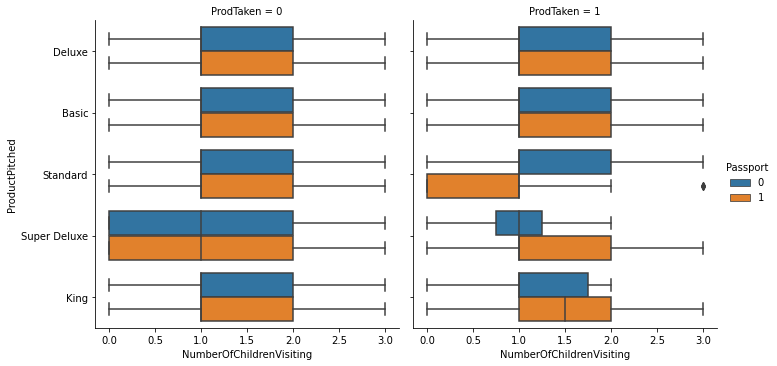

In [35]:
# Checking closer package type, number of children visiting relation to the passport
  

sns.catplot(x="NumberOfChildrenVisiting",
               y = "ProductPitched",
               hue="Passport", 
               col="ProdTaken", 
               data=tour, 
               kind="box");

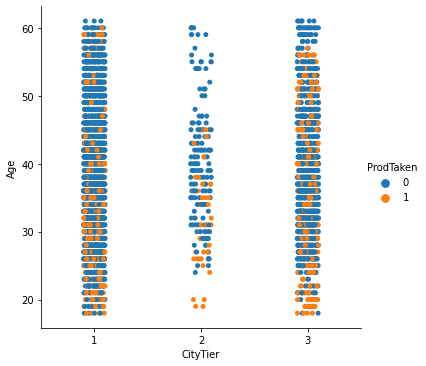

In [36]:
# Let check City Tier and Age. Does it impact the puchasing ? 
sns.catplot(data = tour, x='CityTier', y ='Age' , hue='ProdTaken', jitter=True);
plt.show()

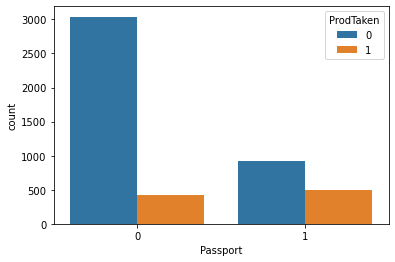

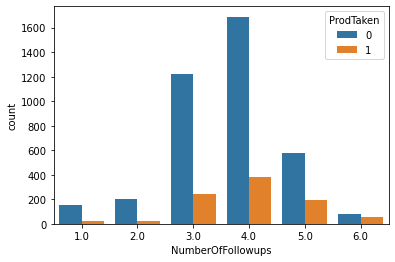

In [37]:
# Checking the products by Gender
sns.countplot (data = tour, x='Passport' , hue = 'ProdTaken');
plt.show ()

# Checking the products by Marital Status
sns.countplot (data = tour, x='NumberOfFollowups' , hue = 'ProdTaken');
plt.show ()

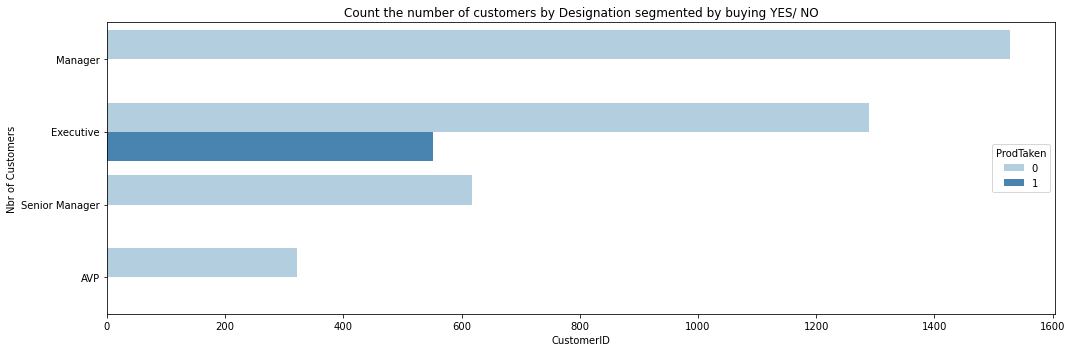

In [38]:
# Function to count the number of customers by Designation segmented by buying YES/ NO
tour_count  = tour['CustomerID'].groupby([tour['Designation'],tour['ProdTaken']]).count()  # number of customers by designation
tour_count = tour_count.reset_index().sort_values(by='CustomerID',ascending=False) # sort in descending order
most_count = tour_count.head()   

fig = plt.figure(figsize=(15,5))
plt.title('Count the number of customers by Designation segmented by buying YES/ NO')

sns.barplot(y='Designation',x='CustomerID',hue='ProdTaken',data=most_count,palette='Blues');

plt.ylabel('Nbr of Customers')
plt.tight_layout()

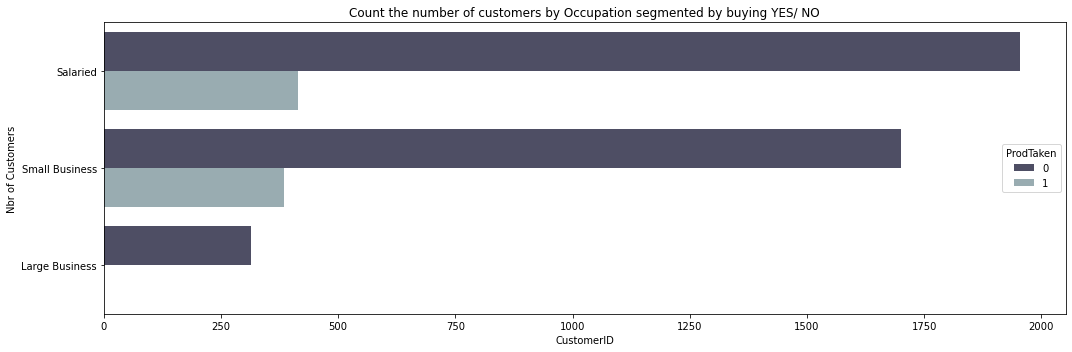

In [39]:
# Function to count the number of customers by Occupation segmented by buying YES/ NO
tour_count  = tour['CustomerID'].groupby([tour['Occupation'],tour['ProdTaken']]).count()  # number of customers by Occupation
tour_count = tour_count.reset_index().sort_values(by='CustomerID',ascending=False) # sort in descending order
most_count = tour_count.head()   

fig = plt.figure(figsize=(15,5))
plt.title('Count the number of customers by Occupation segmented by buying YES/ NO')

sns.barplot(y='Occupation',x='CustomerID',hue='ProdTaken',data=most_count,palette='bone');

plt.ylabel('Nbr of Customers')
plt.tight_layout()

**Observations**

- It shows age is correlated to income but it's not clear gender is playing a role
- Income distribution is higher for single who have not bought travel packages. The customer buying the packages have higher income outliers across the marital statuses
- Having a passport plays a bigger role in case of deciding if buying a travel package. Half of the customers buying a package have a passport
- It looks the number of follow calls may help with the customer buying a package
- An interesting finding, it looks like only executives buy packages, the occupation is salaried  or small businesses


Let go ahead to preprocessing the data and build the model to get the deep insights




### <a name='link5'> Data preprocessing </a>

Decision trees can’t handle non-numeric data, so we will either encode or create dummy variables for the categorical features.

Gender error data entries were fixed before for EDA purposes   
We need to delete CustomerID as it's not a useful variable    DONE   
The following variables are having missing values to handle, number of missing values :   
- DurationOfPitch            , 251 -> impute mean    DONE    
- MonthlyIncome               , 233 -> impute mean   DONE   
- Age                       ,   226 -> impute mean   DONE    
- NumberOfTrips               , 140 -> impute mean   DONE  
- NumberOfChildrenVisiting    ,  66 -> impute median DONE  
- NumberOfFollowups           ,  45 -> impute median DONE   
- PreferredPropertyStar       ,  26 -> delete as only few records DONE    
- TypeofContact               ,  25 -> delete as only few records DONE   

The following variables are categorical so we need to convert them into dummies for model building purposes:
- TypeofContact DONE
- Occupation  DONE
- Gender DONE
- ProductPitched DONE
- MaritalStatus  DONE
- Designation  DONE


In [40]:
# Create another duplicate dataset for data preprocessing, after applying dummies some variable analysis won't be feasible
tour1 = tour.copy()
tour1.head ()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [41]:
# Drop Customer ID is not useful
tour1.drop(['CustomerID'], axis=1, inplace=True)
tour1.head ()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [42]:
# Let impute the mean age into the missing values

imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean') # this formula will be used for mean imputation later 

tour1.Age = imputer_mean.fit_transform(tour1['Age'].values.reshape(-1,1))[:,0]
tour1



,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [43]:
# Let impute the mean Duration Of the Pitch  into the missing values

tour1.DurationOfPitch  = imputer_mean.fit_transform(tour1['DurationOfPitch'].values.reshape(-1,1))[:,0]


In [44]:
# Let impute the mean Monthly Income into the missing values

tour1.MonthlyIncome = imputer_mean.fit_transform(tour1['MonthlyIncome'].values.reshape(-1,1))[:,0]

In [45]:
# Let impute the mean Number Of Trips into the missing values

tour1.NumberOfTrips  = imputer_mean.fit_transform(tour1['NumberOfTrips'].values.reshape(-1,1))[:,0]

In [46]:
# Let impute the median Number Of Children Visiting into the missing values

imputer_median = SimpleImputer(missing_values=np.NaN, strategy='median') # this formula will be used for median imputation later 

tour1.NumberOfChildrenVisiting = imputer_median.fit_transform(tour1['NumberOfChildrenVisiting'].values.reshape(-1,1))[:,0]
tour1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [47]:
# Let impute the median Number Of Followups into the missing values

tour1.NumberOfFollowups = imputer_median.fit_transform(tour1['NumberOfFollowups'].values.reshape(-1,1))[:,0]


In [48]:
# Drop records with missing values as only a few records impacted 
nan_value = float("NaN")

tour1.replace("", nan_value, inplace=True)

tour1.dropna(subset = ["PreferredPropertyStar", "TypeofContact" ], inplace=True)

In [49]:
np.random.seed(1)  # To get the same random results  for validation
tour1.sample(n=10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2217,0,38.000000,Self Enquiry,3,9.000000,Salaried,Male,2,3.0,Deluxe,3.0,Unmarried,1.0,1,3,1,0.0,Manager,21861.000000
1041,0,28.000000,Self Enquiry,3,11.000000,Small Business,Male,2,3.0,Deluxe,5.0,Unmarried,1.0,0,1,1,0.0,Manager,23463.000000
449,0,37.622265,Company Invited,1,14.000000,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,0,2,0,0.0,Executive,23619.853491
4461,1,43.000000,Company Invited,1,26.000000,Small Business,Male,3,2.0,Basic,3.0,Married,8.0,1,3,0,1.0,Executive,21437.000000
607,1,49.000000,Self Enquiry,3,17.000000,Small Business,Female,2,3.0,Standard,3.0,Divorced,2.0,0,4,0,1.0,Senior Manager,22654.000000
1550,0,30.000000,Self Enquiry,1,6.000000,Salaried,Male,2,4.0,Deluxe,3.0,Married,2.0,1,1,1,1.0,Manager,20126.000000
2074,0,42.000000,Self Enquiry,1,15.490835,Salaried,Male,3,3.0,Deluxe,4.0,Married,2.0,0,3,1,0.0,Manager,23619.853491
2137,1,41.000000,Self Enquiry,1,8.000000,Salaried,Female,2,5.0,Basic,3.0,Married,5.0,1,3,0,1.0,Executive,17778.000000
4179,0,30.000000,Self Enquiry,3,9.000000,Small Business,Male,4,5.0,Deluxe,4.0,Married,4.0,0,4,1,1.0,Manager,25322.000000
653,0,50.000000,Company Invited,1,8.000000,Salaried,Male,3,3.0,Super Deluxe,5.0,Married,2.0,0,5,1,2.0,AVP,32924.000000


In [50]:
# looking at variables, have we solved the missing values issues ?
tour1.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

In [51]:
# Compare the baseline dataframe vs. the transformed one

print ('Tour dataset -> ' , tour.shape)
 
print ('Tour1 dataset -> ', tour1.shape)

 

Tour dataset ->  (4888, 20)
Tour1 dataset ->  (4837, 19)


In [52]:
# Let create another copy before handling dummies

tour2 = tour1.copy()

In [53]:
# Create dummies  
tour2 = pd.get_dummies(tour2, columns=["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation" ], drop_first=True)
np.random.seed(1)
tour2.sample(n=10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2217,0,38.000000,3,9.000000,2,3.0,3.0,1.0,1,3,...,0,0,0,0,0,1,0,1,0,0
1041,0,28.000000,3,11.000000,2,3.0,5.0,1.0,0,1,...,0,0,0,0,0,1,0,1,0,0
449,0,37.622265,1,14.000000,2,3.0,3.0,2.0,0,2,...,0,0,0,0,0,0,1,0,0,0
4461,1,43.000000,1,26.000000,3,2.0,3.0,8.0,1,3,...,0,0,0,1,0,0,1,0,0,0
607,1,49.000000,3,17.000000,2,3.0,3.0,2.0,0,4,...,0,1,0,0,0,0,0,0,1,0
1550,0,30.000000,1,6.000000,2,4.0,3.0,2.0,1,1,...,0,0,0,1,0,0,0,1,0,0
2074,0,42.000000,1,15.490835,3,3.0,4.0,2.0,0,3,...,0,0,0,1,0,0,0,1,0,0
2137,1,41.000000,1,8.000000,2,5.0,3.0,5.0,1,3,...,0,0,0,1,0,0,1,0,0,0
4179,0,30.000000,3,9.000000,4,5.0,4.0,4.0,0,4,...,0,0,0,1,0,0,0,1,0,0
653,0,50.000000,1,8.000000,3,3.0,5.0,2.0,0,5,...,0,0,1,1,0,0,0,0,0,0


In [54]:
# Compare the baseline dataframe vs. the transformed ones

print ('Tour dataset -> ' , tour.shape)
 
print ('Tour1 dataset -> ', tour1.shape)

print ('Tour2 dataset -> ', tour2.shape)

Tour dataset ->  (4888, 20)
Tour1 dataset ->  (4837, 19)
Tour2 dataset ->  (4837, 29)


In [55]:
# Check the data types   
tour2.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4837 non-null   int64  
 1   Age                          4837 non-null   float64
 2   CityTier                     4837 non-null   int64  
 3   DurationOfPitch              4837 non-null   float64
 4   NumberOfPersonVisiting       4837 non-null   int64  
 5   NumberOfFollowups            4837 non-null   float64
 6   PreferredPropertyStar        4837 non-null   float64
 7   NumberOfTrips                4837 non-null   float64
 8   Passport                     4837 non-null   int64  
 9   PitchSatisfactionScore       4837 non-null   int64  
 10  OwnCar                       4837 non-null   int64  
 11  NumberOfChildrenVisiting     4837 non-null   float64
 12  MonthlyIncome                4837 non-null   float64
 13  TypeofContact_Self

After the data pre-processing we are ready to move ahead in building the models.

### <a name='link6'> Model building - preparations  </a>


The company wants to focus the campaign on the customers which are going to buy their new Wellness travel package.  As well “Visit with us” wants to use their marketing campaign budget effectively. Based on existing data, what made the customers buy? The models will predict if the customer will buy: YES/ NO.       
True Positives (TP) is the focus, so Recall is the most important metric but as well the company doesn't want to lose potential customers - False Negatives (FN), so the following metrics are important as well: Accuracy and F1 Score.          
In conclusion, we will balance between increasing Recall but w/o significantly deteriorating  Accuracy and F1 Score while creating and evaluating the models' performance.
Random forest handles outliers by essentially binning them. And overall decision trees don’t care about outliers, so we aren't treated them. 


In [56]:
# Create our predicted variable, y = ProdTaken
X = tour2.drop("ProdTaken" , axis=1)
y = tour2.pop("ProdTaken")

Let stratify the train and test split to ensure the proportions are balanced. 

In [57]:
# Split and create train and test datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

Let build functions to calculate the different metrics and confusion matrix.

In [58]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test2)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
##  Function to calculate different metrics' scores of the model - Accuracy, Recall, F1 Score and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train2)
    pred_test = model.predict(X_test2)
    
    #Accuracy of the model
    train_acc = model.score(X_train2,y_train2)
    test_acc = model.score(X_test2,y_test2)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train2,pred_train)
    test_recall = metrics.recall_score(y_test2,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train2,pred_train)
    test_precision = metrics.precision_score(y_test2,pred_test)
    
    # Compute F1-score
    train_f1 = metrics.f1_score(y_train2,pred_train)
    test_f1 = metrics.f1_score(y_test2,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train2,y_train2))
        print("Accuracy on test set : ",model.score(X_test2,y_test2))
        print("Recall on training set : ",metrics.recall_score(y_train2,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test2,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train2,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test2,pred_test))
        print("F1 Score training set : ",metrics.f1_score(y_train2,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test2,pred_test))
    
    return score_list # returning the list with train and test scores

### <a name='link7'> Model building - Bagging </a>

#### Decision Tree

In [60]:
# Create the decision tree using gini, this is our baseline
dTree2 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree2.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=1)

In [61]:
#Using above defined function to the train and test metrics
decision_tree_score=get_metrics_score(dTree2)

Accuracy on training set :  1.0
Accuracy on test set :  0.8891184573002755
Recall on training set :  1.0
Recall on test set :  0.7142857142857143
Precision on training set :  1.0
Precision on test set :  0.7014388489208633
F1 Score training set :  1.0
F1 Score on test set :  0.7078039927404718


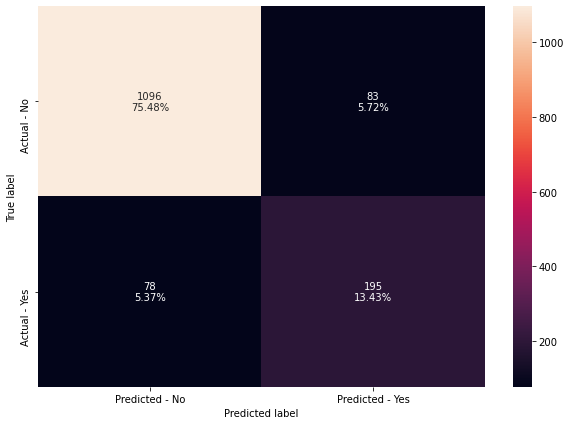

In [62]:
# Let check the confusion matrix
make_confusion_matrix(dTree2,y_test2)

In [63]:
# Let check the variables names
feature_names = list(X.columns)
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


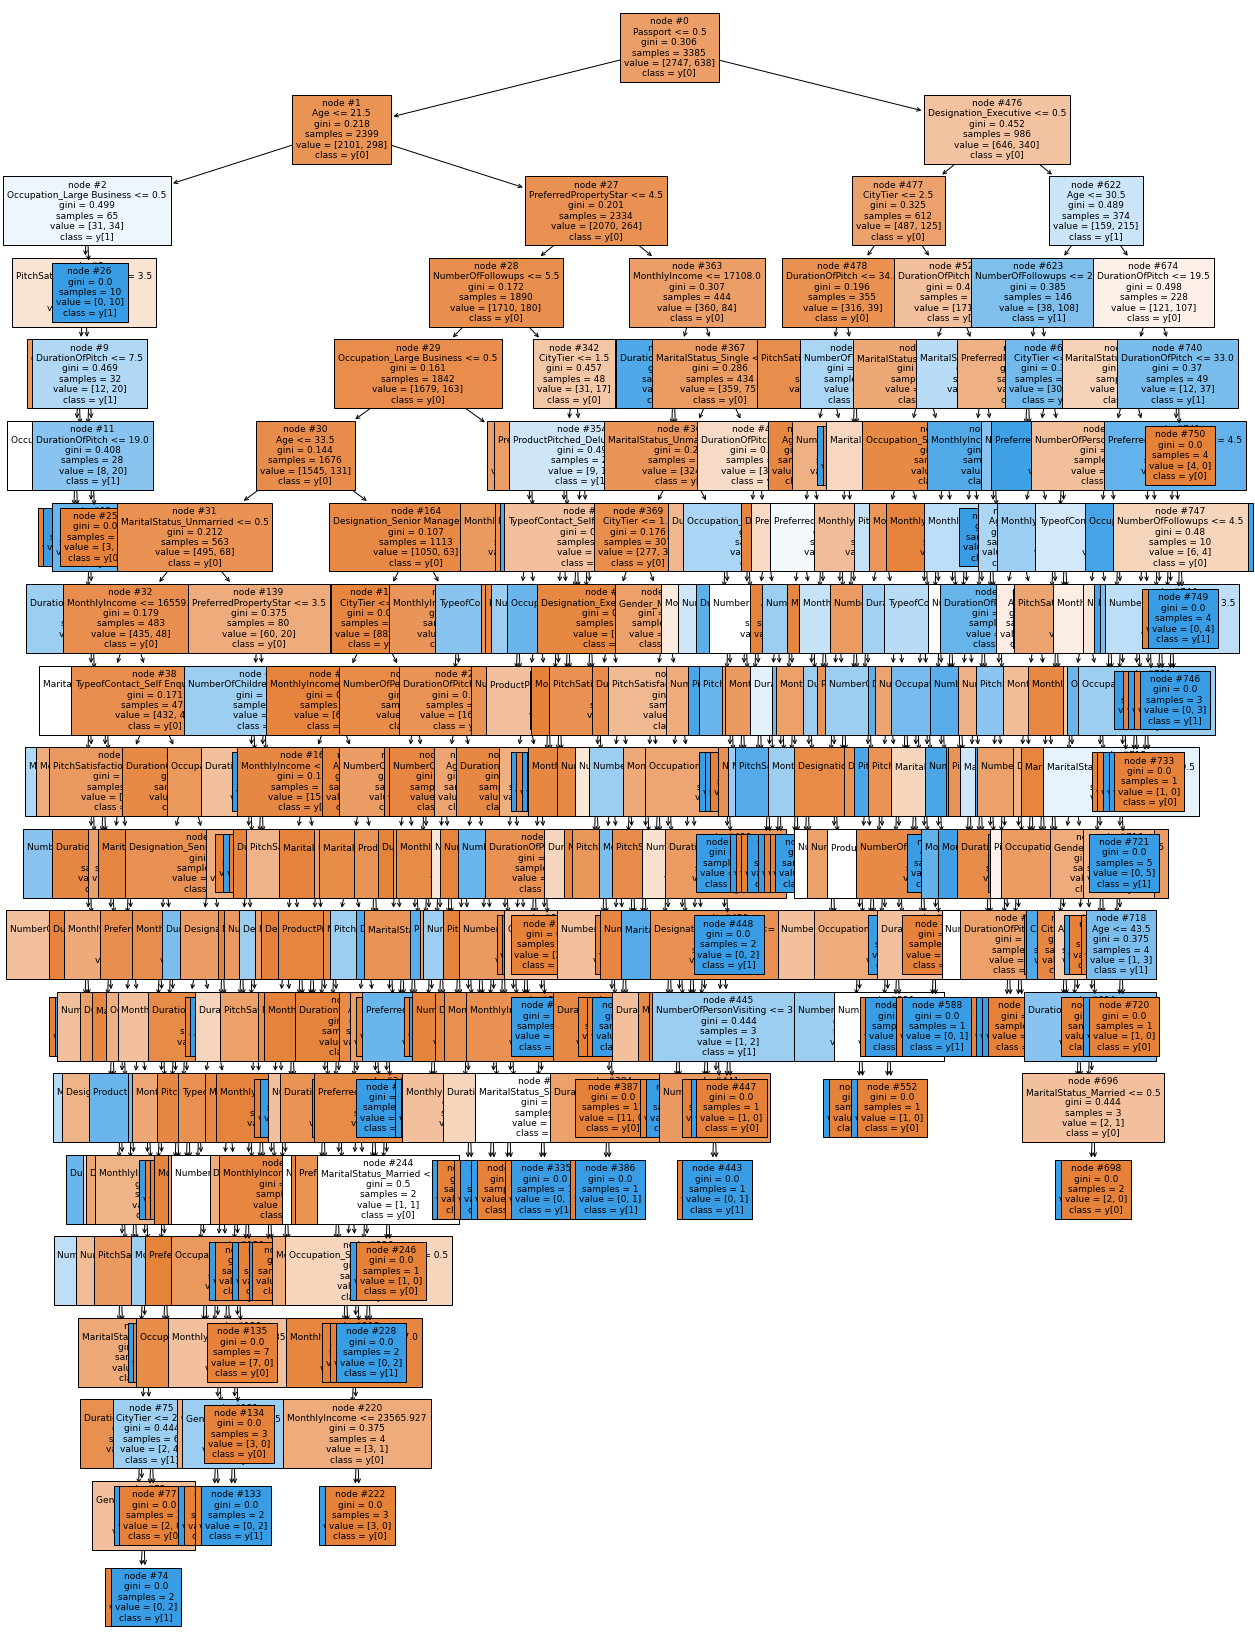

In [64]:
# Let build the decision tree visually 
plt.figure(figsize=(20,30))
tree.plot_tree(dTree2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [65]:
# Text report showing the rules of a decision tree

print(tree.export_text(dTree2,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 21.50
|   |   |--- Occupation_Large Business <= 0.50
|   |   |   |--- PitchSatisfactionScore <= 3.50
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- Occupation_Salaried <= 0.50
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |--- Occupation_Salaried >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |--- PitchSatisfactionScore >  3.50
|   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- DurationOfPitch >  7.50
|   |   |   |   |   |--- DurationOfPitch <= 19.00
|   |   |   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |   |   |--- weights: [0.00, 10.00] class: 1
|   |   |   |   |   |   |--- Age >  19.50
|   |   |   |   |   |   |   |--- DurationOfPitch <= 15.25
|   |   |   |   |   |   |   |   |--- CityTier

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree2.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))

                             Importance
DurationOfPitch                0.145842
Age                            0.139938
MonthlyIncome                  0.101886
NumberOfTrips                  0.075739
Designation_Executive          0.068524
Passport                       0.065686
PitchSatisfactionScore         0.058588
NumberOfFollowups              0.054363
PreferredPropertyStar          0.039674
CityTier                       0.037702
MaritalStatus_Single           0.026464
NumberOfPersonVisiting         0.025335
Gender_Male                    0.022752
MaritalStatus_Unmarried        0.019674
MaritalStatus_Married          0.018220
TypeofContact_Self Enquiry     0.015824
Occupation_Salaried            0.014518
Occupation_Large Business      0.014368
Occupation_Small Business      0.012203
NumberOfChildrenVisiting       0.009996
Designation_Senior Manager     0.009964
OwnCar                         0.008042
ProductPitched_Deluxe          0.007862
Designation_VP                 0.003381


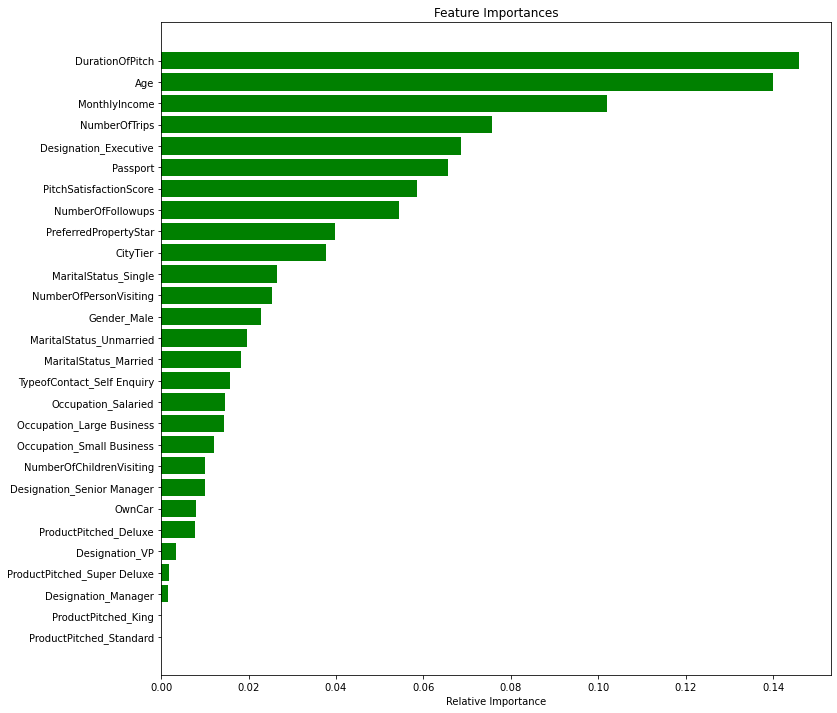

In [67]:
importances = dTree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Bagging classifier

In [68]:
# Building a bagging classifier, it's a decision tree

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train2,y_train2)

BaggingClassifier(random_state=1)

In [69]:
#Using above defined function to the train and test metrics
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9946824224519941
Accuracy on test set :  0.9104683195592287
Recall on training set :  0.9717868338557993
Recall on test set :  0.6153846153846154
Precision on training set :  1.0
Precision on test set :  0.8704663212435233
F1 Score training set :  0.985691573926868
F1 Score on test set :  0.721030042918455


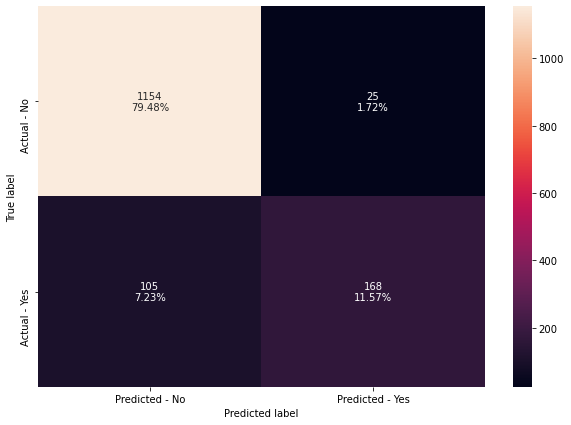

In [70]:
# Let check the confusion matrix
make_confusion_matrix(bagging_estimator,y_test2)

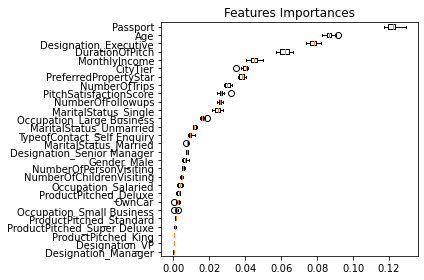

In [74]:
# Importance of features in the bagging classifier building , we compute the mean brought by that features. 

from sklearn.inspection import permutation_importance # Let import the permutation importance function
result_bc = permutation_importance(bagging_estimator, X_train2, y_train2, n_repeats=10,
                                random_state=1)
indices = result_bc.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_bc.importances[indices].T,
           vert=False, labels=X_train2.columns[indices])
ax.set_title("Features Importances")
fig.tight_layout()
plt.show()



#### Random Forest Classifier

In [75]:
#Let train the random forest classifier
rf_est=RandomForestClassifier(random_state=1)
rf_est.fit(X_train2,y_train2)

RandomForestClassifier(random_state=1)

In [76]:
#Using above defined function to the train and test metrics
random_forest_score=get_metrics_score(rf_est)

Accuracy on training set :  1.0
Accuracy on test set :  0.9132231404958677
Recall on training set :  1.0
Recall on test set :  0.5897435897435898
Precision on training set :  1.0
Precision on test set :  0.92
F1 Score training set :  1.0
F1 Score on test set :  0.71875


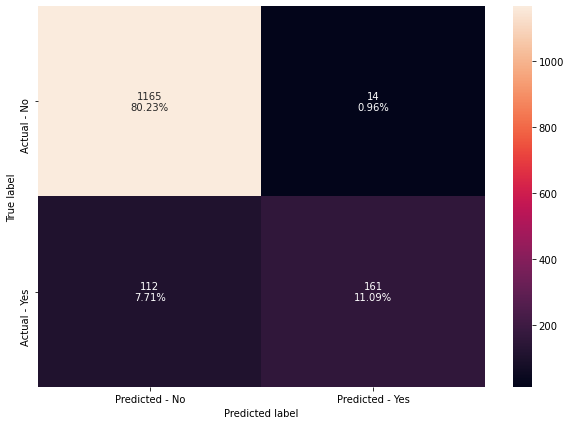

In [77]:
# Let check the confusion matrix
make_confusion_matrix(rf_est,y_test2)

In [79]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_est.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))

                             Importance
Age                            0.131526
MonthlyIncome                  0.124463
DurationOfPitch                0.103407
Passport                       0.078445
NumberOfTrips                  0.064435
PitchSatisfactionScore         0.056456
NumberOfFollowups              0.055191
PreferredPropertyStar          0.043274
CityTier                       0.033356
Designation_Executive          0.032181
NumberOfChildrenVisiting       0.031466
NumberOfPersonVisiting         0.027512
MaritalStatus_Single           0.026026
TypeofContact_Self Enquiry     0.024335
Gender_Male                    0.023860
OwnCar                         0.020334
Occupation_Salaried            0.018705
Occupation_Small Business      0.018517
MaritalStatus_Married          0.017324
MaritalStatus_Unmarried        0.014983
Occupation_Large Business      0.014605
Designation_Manager            0.009900
ProductPitched_Deluxe          0.008277
Designation_Senior Manager     0.006864


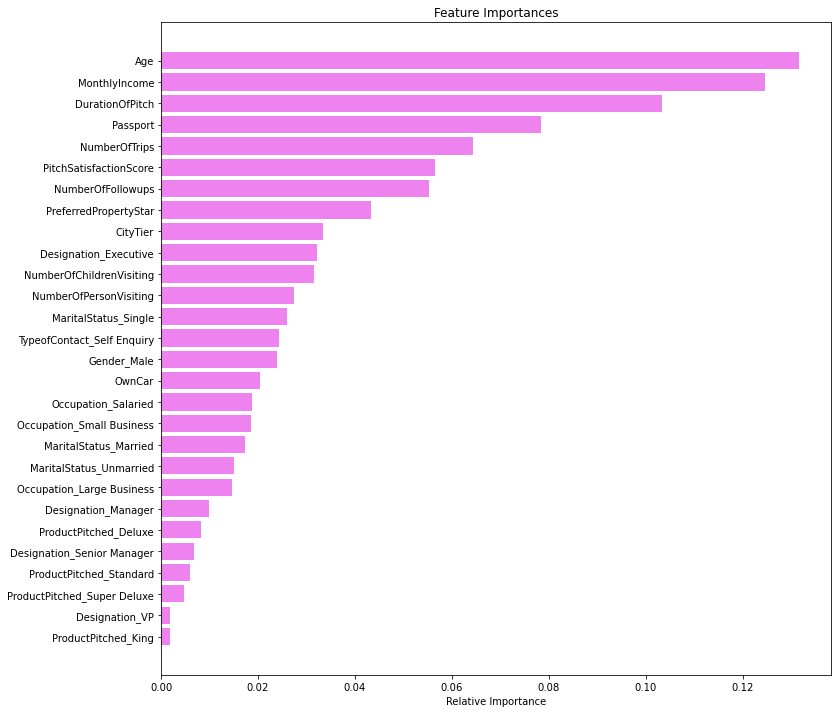

In [80]:
# Let look for the features importance in the model 
importances_rf = rf_est.feature_importances_
indices = np.argsort(importances_rf)
feature_names_rf = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_rf[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names_rf[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

Bagging models observations:    
Its clear training having scores = 1 using the train dataset across the random forest and decision tree models, with a slightly slower score using the bagging classifier model.    
The test dataset is giving worse results, especially the decision tree model with the best being the bagging classifier model. 
The above indicates overfitting. We need to tune the models in the next phase.     
The key common contributors to predicting a customer will buy the package per the bagging models:  
- Monthly income   
- Age   
- Duration of the pitch    
- Number of trips 
- City tier
- Has passport?   
- Designation as executive
   


### <a name='link8'> Model performance improvement - Bagging </a>

#### Tune the decision tree

We are going to use the GridSearch for Hyperparameter tuning of our tree model.
 
- max_depth : this determines the maximum depth of the tree.
- min_samples_leaf: the number of features to consider when looking for the best split. 
- max_leaf_nodes: if None, then nodes are expanded until all leaves are pure. So, we can limit them with this value. 
- min_impurity_decrease : the node splits if this split induces a decrease of the impurity greater than or equal to this value.



In [81]:

# Choose the type of classifier. 
estimator_t = DecisionTreeClassifier(random_state=1)

# Grid of parameters used
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 8],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj2 = GridSearchCV(estimator_t, parameters, scoring=acc_scorer,cv=5)
grid_obj2 = grid_obj2.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
estimator_t = grid_obj2.best_estimator_

# Fit the best algorithm to the data
estimator_t.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [82]:
#Using above defined function to the train and test metrics
decision_tree_improved=get_metrics_score(estimator_t)

Accuracy on training set :  0.8289512555391433
Accuracy on test set :  0.8209366391184573
Recall on training set :  0.390282131661442
Recall on test set :  0.4065934065934066
Precision on training set :  0.5671981776765376
Precision on test set :  0.5311004784688995
F1 Score training set :  0.4623955431754874
F1 Score on test set :  0.4605809128630705


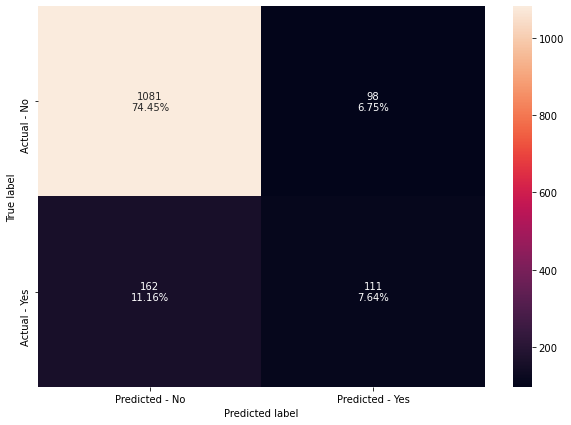

In [83]:
# Let check the confusion matrix
make_confusion_matrix(estimator_t,y_test2)

#### Hyperparameter Tuning Bagging Classifier

In order to improve the model performance we are going to use some of the hyperparameters available:
- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.   
- n_estimators: The number of trees in the forest, default = 100.    
- max_features: The number of features to consider when looking for the best split.    
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.    
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.    
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.   
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.   

In [84]:
# Choose the type of classifier. 
bagging_estimator_improved = BaggingClassifier(random_state=1)

# Grid of parameters used
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_improved, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
bagging_estimator_improved = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_improved.fit(X_train2, y_train2)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=30,
                  random_state=1)

In [85]:
#Using above defined function to the train and test metrics
bagging_estimator_improved_score=get_metrics_score(bagging_estimator_improved)

Accuracy on training set :  0.9967503692762186
Accuracy on test set :  0.8994490358126722
Recall on training set :  0.9843260188087775
Recall on test set :  0.5714285714285714
Precision on training set :  0.9984101748807631
Precision on test set :  0.8432432432432433
F1 Score training set :  0.9913180741910024
F1 Score on test set :  0.6812227074235808


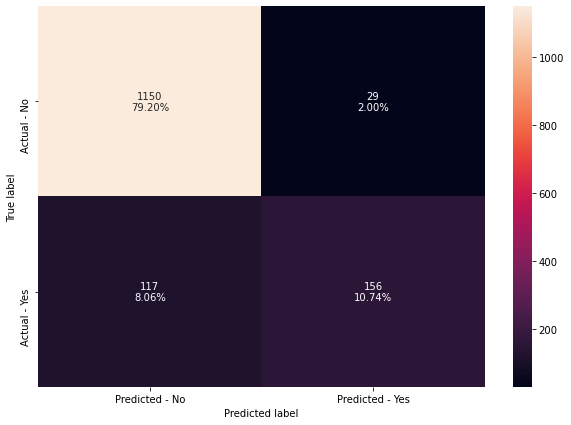

In [86]:
# Let check the confusion matrix
make_confusion_matrix(bagging_estimator_improved,y_test2)

#### Tune using class weights for Random Forest

We should make the model aware that the class of interest: the customer buying the package.

- class_weight: specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. Passing the parameter `class_weights` available for Random Forest. This parameter is not available for the bagging classifier. We can choose class_weights={0:0.81,1:0.19} because that is the original imbalance in our data. We learned this value during the univariable analysis.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- n_estimators: The number of trees in the forest, default = 100.    
- max_features: The number of features to consider when looking for the best split. 
- min_samples_leaf: the number of features to consider when looking for the best split. 


In [87]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters used
parameters = {
    "class_weight": [{0: 0.81, 1: 0.19}],
    "n_estimators": [100,150,200],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.6, 0.1),
    "max_samples": np.arange(0.3, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj3 = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj3 = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
rf_estimator_weighted = grid_obj3.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train2, y_train2)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=30,
                  random_state=1)

In [88]:
#Using above defined function to the train and test metrics
rf_estimator_improved_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9967503692762186
Accuracy on test set :  0.8994490358126722
Recall on training set :  0.9843260188087775
Recall on test set :  0.5714285714285714
Precision on training set :  0.9984101748807631
Precision on test set :  0.8432432432432433
F1 Score training set :  0.9913180741910024
F1 Score on test set :  0.6812227074235808


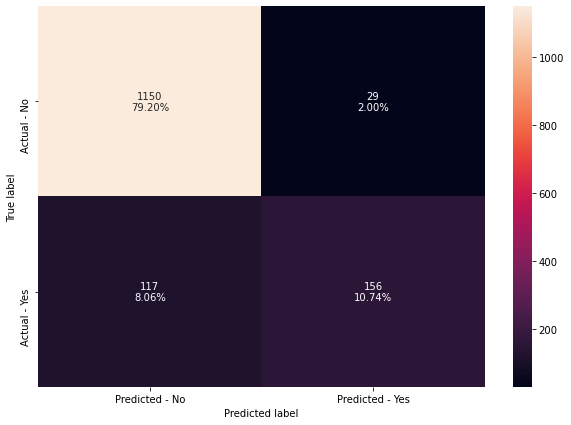

In [89]:
# Let check the confusion matrix
make_confusion_matrix(rf_estimator_weighted,y_test2)

**Observations**

The Decision Tree tuned, Bagging Classifier tuned and Random Fores tuned models are doing worse than the original ones.    
Let continue and try to build new models using the boosting techniques.


### <a name='link9'> Model building - Boosting </a>

Let build 4 models: AdaBoost Classifier, Gradient Boosting Classifier, XGBoost, and Stacking classifiers.

####  AdaBoost Classifier

In [90]:
# Let build a model using Adaboost Classifier
adab = AdaBoostClassifier(random_state=1)
adab.fit(X_train2,y_train2)

AdaBoostClassifier(random_state=1)

In [91]:
#Using above defined function to the train and test metrics
Ada_Boost_Classifier_score = get_metrics_score(adab)

Accuracy on training set :  0.8552437223042836
Accuracy on test set :  0.8367768595041323
Recall on training set :  0.36363636363636365
Recall on test set :  0.3516483516483517
Precision on training set :  0.7341772151898734
Precision on test set :  0.6153846153846154
F1 Score training set :  0.4863731656184487
F1 Score on test set :  0.4475524475524476


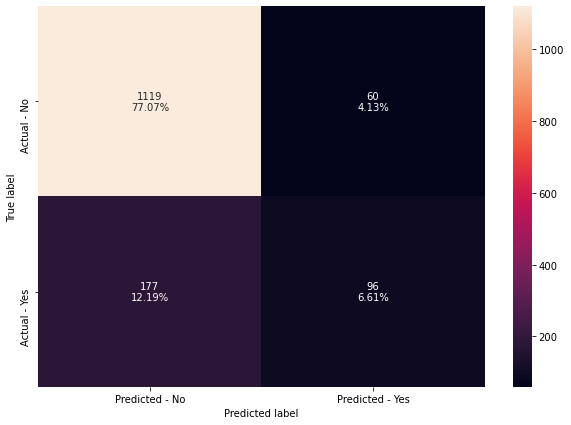

In [92]:
# Let check the confusion matrix
make_confusion_matrix(adab,y_test2)

In [93]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(adab.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))


                             Importance
MonthlyIncome                      0.28
Age                                0.14
DurationOfPitch                    0.08
NumberOfFollowups                  0.06
NumberOfTrips                      0.06
PreferredPropertyStar              0.04
Passport                           0.04
PitchSatisfactionScore             0.04
MaritalStatus_Unmarried            0.04
CityTier                           0.04
Gender_Male                        0.02
Designation_Senior Manager         0.02
Designation_Executive              0.02
MaritalStatus_Single               0.02
ProductPitched_Super Deluxe        0.02
Occupation_Salaried                0.02
Occupation_Large Business          0.02
TypeofContact_Self Enquiry         0.02
NumberOfPersonVisiting             0.02
Occupation_Small Business          0.00
ProductPitched_Deluxe              0.00
ProductPitched_King                0.00
ProductPitched_Standard            0.00
MaritalStatus_Married              0.00


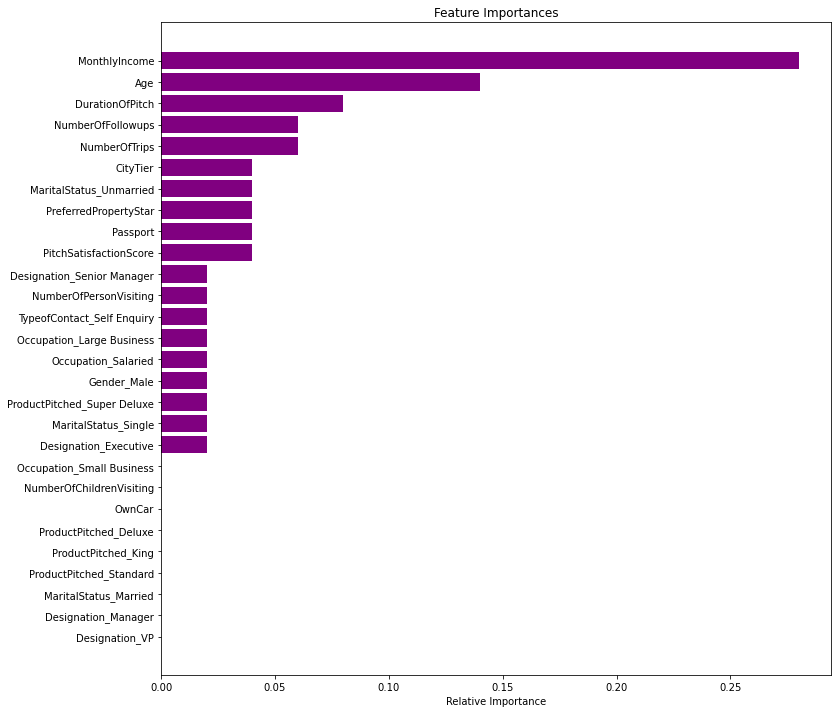

In [94]:
importances = adab.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####  Gradient Boosting Classifier

In [95]:
# Let build a model using Gradient Boosting Classifier
grabc = GradientBoostingClassifier(random_state=1)
grabc.fit(X_train2,y_train2)

GradientBoostingClassifier(random_state=1)

In [96]:
#Using above defined function to the train and test metrics
Gradient_Boosting_Classifier_score = get_metrics_score(grabc)

Accuracy on training set :  0.892466765140325
Accuracy on test set :  0.8657024793388429
Recall on training set :  0.5
Recall on test set :  0.46153846153846156
Precision on training set :  0.8763736263736264
Precision on test set :  0.7241379310344828
F1 Score training set :  0.6367265469061876
F1 Score on test set :  0.5637583892617449


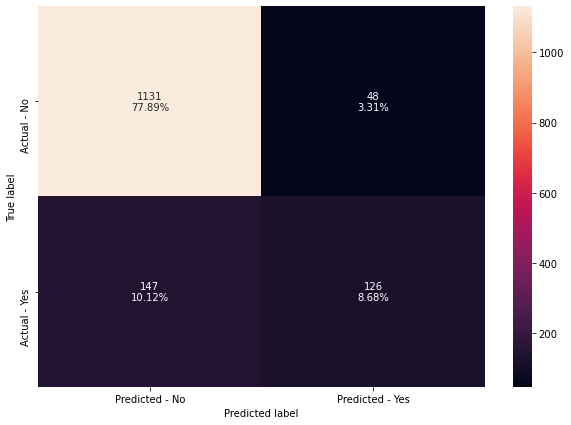

In [97]:
# Let check the confusion matrix
make_confusion_matrix(grabc,y_test2)

In [98]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(grabc.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))


                             Importance
Passport                       0.165563
Age                            0.160842
Designation_Executive          0.130383
MonthlyIncome                  0.114167
DurationOfPitch                0.064300
NumberOfFollowups              0.059501
MaritalStatus_Single           0.055979
PreferredPropertyStar          0.047160
CityTier                       0.046548
NumberOfTrips                  0.035778
PitchSatisfactionScore         0.024694
MaritalStatus_Unmarried        0.023447
Occupation_Large Business      0.017864
ProductPitched_Standard        0.010024
NumberOfPersonVisiting         0.008943
Designation_Manager            0.005959
MaritalStatus_Married          0.005067
TypeofContact_Self Enquiry     0.004713
ProductPitched_Deluxe          0.004073
Gender_Male                    0.003596
NumberOfChildrenVisiting       0.003515
Designation_Senior Manager     0.002711
ProductPitched_Super Deluxe    0.001852
Occupation_Salaried            0.001437


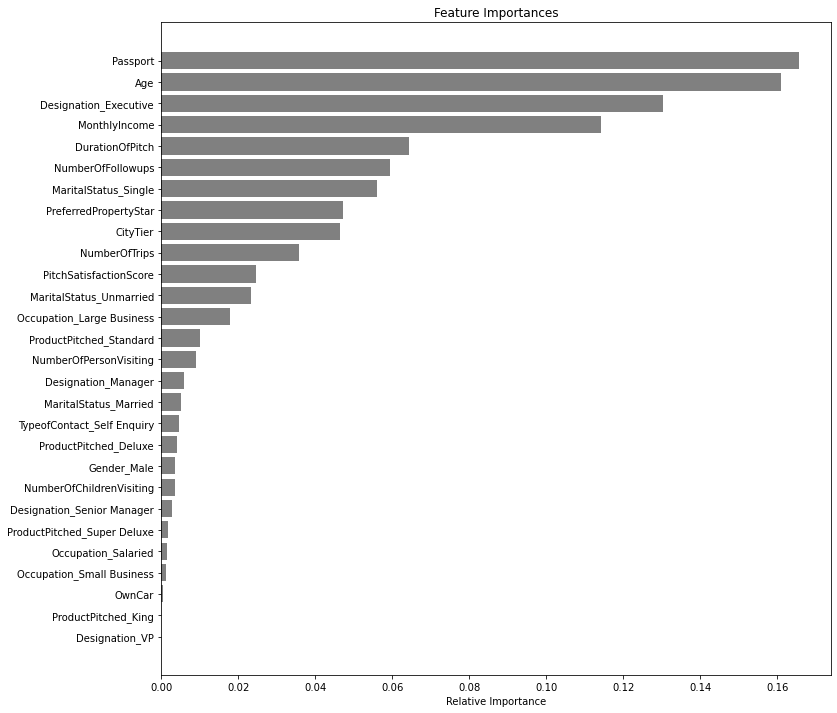

In [99]:
importances = grabc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####  XGBoost Classifier

In [100]:
# Let build a model using XG Boost Classifier
xgboost = XGBClassifier(random_state=1,eval_metric='logloss')
xgboost.fit(X_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [101]:
#Using above defined function to the train and test metrics
XGB_Classifier_score = get_metrics_score(xgboost)

Accuracy on training set :  1.0
Accuracy on test set :  0.9269972451790633
Recall on training set :  1.0
Recall on test set :  0.6959706959706959
Precision on training set :  1.0
Precision on test set :  0.892018779342723
F1 Score training set :  1.0
F1 Score on test set :  0.7818930041152263


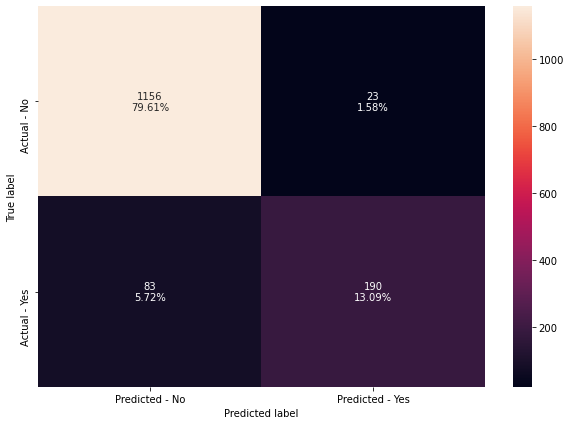

In [102]:
# Let check the confusion matrix
make_confusion_matrix(xgboost,y_test2)

In [103]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgboost.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))


                             Importance
Designation_Executive          0.133042
Passport                       0.106341
MaritalStatus_Single           0.050239
CityTier                       0.046843
ProductPitched_King            0.044090
Occupation_Large Business      0.043960
ProductPitched_Standard        0.041275
Age                            0.036438
MaritalStatus_Unmarried        0.036058
NumberOfFollowups              0.035995
PreferredPropertyStar          0.035154
TypeofContact_Self Enquiry     0.034494
MaritalStatus_Married          0.034265
PitchSatisfactionScore         0.033895
NumberOfTrips                  0.033329
DurationOfPitch                0.031671
Occupation_Small Business      0.031312
Gender_Male                    0.030493
ProductPitched_Super Deluxe    0.028412
ProductPitched_Deluxe          0.027960
MonthlyIncome                  0.024404
NumberOfPersonVisiting         0.023584
OwnCar                         0.021614
Occupation_Salaried            0.018322


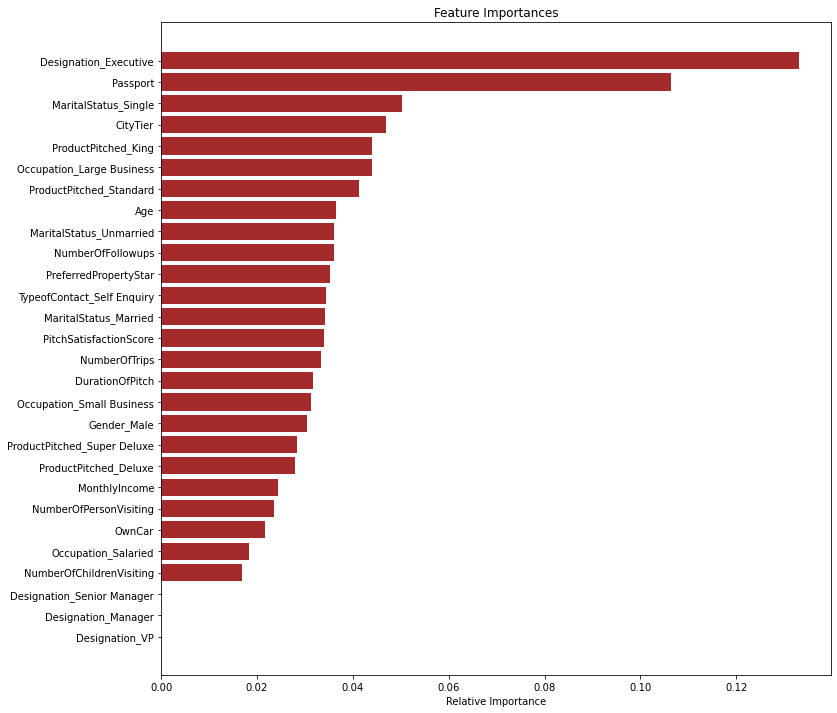

In [104]:
importances = xgboost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####  Stacking Classifier

In [105]:
# Let build a Stacking Classifier model using a combination of previous models:  Random Forest tuned, 
# Bagging Estimator tuned, Decision Tree tuned, and final estimator xgboost
# It may improve the previously tuned models

estimators = [('Random Forest tuned',rf_estimator_weighted), ('Bagging Estimator tuned',bagging_estimator_improved), ('Decision Tree tuned',estimator_t)]

final_estimator = xgboost

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train2,y_train2)

StackingClassifier(estimators=[('Random Forest tuned',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.8,
                                                  n_estimators=30,
                                                  random_state=1)),
                               ('Bagging Estimator tuned',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.8,
                                                  n_estimators=30,
                                                  random_state=1)),
                               ('Decision Tree tuned',
                                DecisionTreeClassifier(max_depth=2,
                                                       max_leaf_nodes=5,
                                                       min_impurity_decrease=0.001,
                                                       rand...
   

In [106]:
#Using above defined function to the train and test metrics
stacking_classifier_score = get_metrics_score(stacking_classifier)

Accuracy on training set :  0.9982274741506647
Accuracy on test set :  0.9077134986225895
Recall on training set :  0.9968652037617555
Recall on test set :  0.6886446886446886
Precision on training set :  0.99375
Precision on test set :  0.7932489451476793
F1 Score training set :  0.9953051643192489
F1 Score on test set :  0.7372549019607845


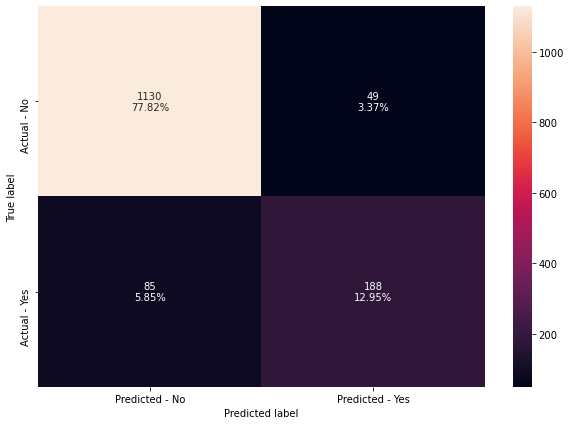

In [107]:
# Let check the confusion matrix
make_confusion_matrix(stacking_classifier,y_test2)

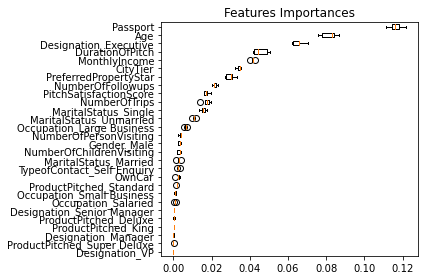

In [109]:
# Importance of features in Stacking Classifier building , we compute the mean brought by that features. 

result_sc = permutation_importance(stacking_classifier, X_train2, y_train2)
indices = result_sc.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_sc.importances[indices].T,
           vert=False, labels=X_train2.columns[indices])
ax.set_title("Features Importances")
fig.tight_layout()
plt.show()


**Observations**


We can observe maybe overfitting in XGBoost classifier, the biggest gap between train and test datasets is with Recall; a very import metric, TP (true-positives),  the train vs. test dataset gap is pretty significant.    
The Stacking Classifier is having similar performance to XGBoost.      
Adaboost and Gradient Boosting Classifiers' performance are lower but the train and test dataset results are closer.     
Let continue by tuning the boosting models.   
The top features' importance is similar across the model with some variations: we can mention the repeated ones: Passport holder, designation executive, age, monthly income, city tier, marital status single, number of follow-ups.



### <a name='link10'> Model performance improvement - Boosting </a>

As part of the observations mentioned above, we are going to improve the following models: AdaBoost, Gradient Boosting classifier, and XGBoost. 

#### AdaBoost Classifier, Hyperparameter Tuning

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
Some important hyperparameters used for the improvement:
- base_estimator: the base estimator from which the boosted ensemble is built. By default, the base estimator is a decision tree with max_depth=1
- n_estimators: the maximum number of estimators at which boosting is terminated. The default value is 50.
- learning_rate: learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.
- random_state: Random State instance or None, default=None. Controls the random seed given at each base_estimator at each boosting iteration. Thus, it is only used when base_estimator exposes a random_state. Pass an int for reproducible output across multiple function calls.
- max_depth: default=None , the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


In [110]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters  
parameters = {
    #Let's try base_estimator random_state, max_depth, base_estimator, n_estimators and learning_rate 
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,20,50),
    "learning_rate":np.arange(0.1,0.5,0.9)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train2, y_train2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [111]:
#Using above defined function to the train and test metrics
AdaBoost_Classifier_tuned_score = get_metrics_score(abc_tuned)

Accuracy on training set :  0.840768094534712
Accuracy on test set :  0.837465564738292
Recall on training set :  0.24294670846394983
Recall on test set :  0.2564102564102564
Precision on training set :  0.7345971563981043
Precision on test set :  0.6796116504854369
F1 Score training set :  0.3651354534746761
F1 Score on test set :  0.3723404255319149


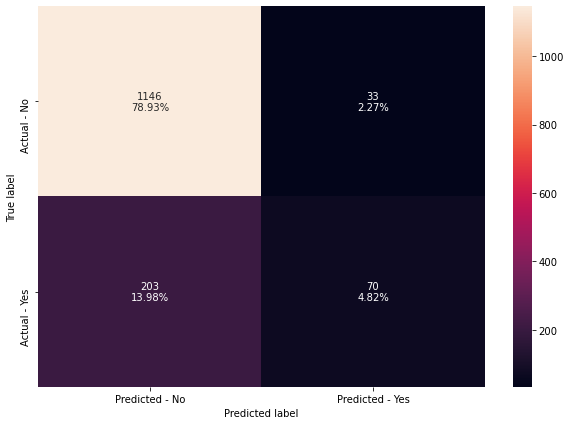

In [112]:
# Let check the confusion matrix
make_confusion_matrix(abc_tuned,y_test2)

#### Gradient Boosting Classifier, Hyperparameter Tuning

We are going to improve the model by using below hyperparameter tuning:

- subsample: the number of observations to enforce for each stage.
- n_estimators: the maximum number of estimators at which boosting is terminated. The default value is 50.
- max_features: The number of features to consider when looking for the best split.

In [113]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters used
parameters = {
    "n_estimators": [50,100,150,200],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train2, y_train2)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

In [114]:
#Using above defined function to the train and test metrics
Gradient_Boosting_Classifier_tuned_score = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.921122599704579
Accuracy on test set :  0.8753443526170799
Recall on training set :  0.6379310344827587
Recall on test set :  0.5054945054945055
Precision on training set :  0.9187358916478555
Precision on test set :  0.75
F1 Score training set :  0.7530064754856614
F1 Score on test set :  0.6039387308533917


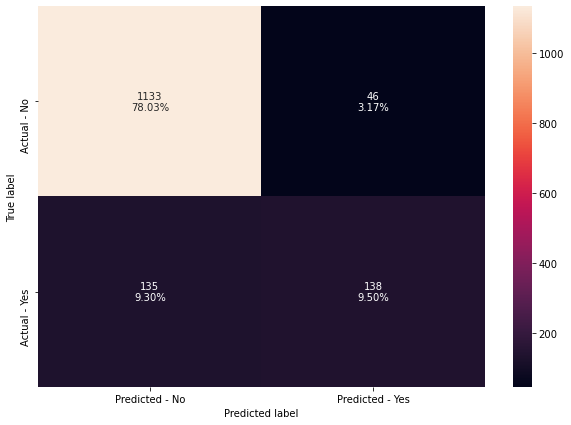

In [115]:
# Let check the confusion matrix
make_confusion_matrix(gbc_tuned,y_test2)

#### XGBoost Classifier, Hyperparameter Tuning

We are going to tune the below hyperparameters to improve the XGBoost model:

- scale_pos_weight: Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [116]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters used n_estimators, scale_pos_weight, subsample, learning_rate, gamma, colsample_bytree, colsample_bylevel
parameters = {
    "n_estimators": np.arange(10,20,50),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,2,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [117]:
#Using above defined function to the train and test metrics
XGB_Classifier_tuned_score = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8091580502215657
Accuracy on test set :  0.7224517906336089
Recall on training set :  0.9137931034482759
Recall on test set :  0.7619047619047619
Precision on training set :  0.49659284497444633
Precision on test set :  0.38095238095238093
F1 Score training set :  0.6434878587196468
F1 Score on test set :  0.5079365079365079


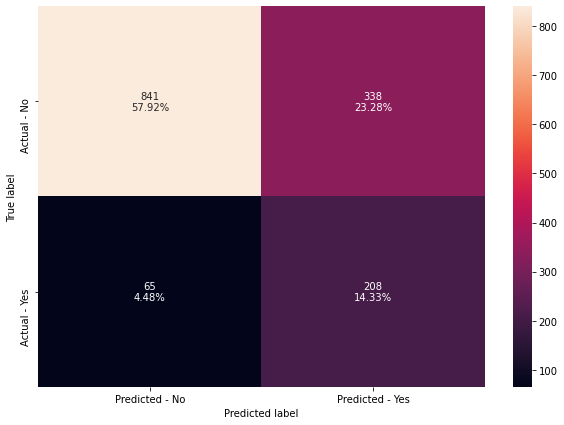

In [118]:
# Let check the confusion matrix
make_confusion_matrix(xgb_tuned,y_test2)

**Observations**

The AdaBoost Classifier tuned and Gradient Boosting Classifier tuned models are doing slightly worse vs. the original ones, so the improvement didn't pay off.   
As well the XGBoost Classifier tuned is doing much worse vs. the original model.      
So the hyperparameters tuning besides adding significant processing time didn't help.    


### <a name='link11'> Conclusions and wrap up </a>

We are going to summarize and compare the models' performance, and then provide recommendations to the "Visit with us" company.  

#### Models comparison

In [119]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree', ' Bagging Classifier',' Random Forest Classifier',' Decision tree tuned',
' Random Forest tuned',' Bagging_estimator tuned', ' AdaBoost Classifier',' Gradient Boosting Classifier',' XGBoost Classifier',
' Stacking Classifier',' AdaBoost Classifier tuned',' Gradient Boosting Classifier tuned',' XGBoost Classifier tuned'],  
 'Train Accuracy': [1,0.99,1,0.82, 0.99, 0.99, 0.85, 0.89, 1, 0.99, 0.84, 0.92, 0.8],'Test Acuracy':[0.88,0.91,0.91,0.82, 0.89, 0.89, 0.83, 0.86, 0.92, 0.9, 0.83, 0.87, 0.72],
  'Train Recall':[1,0.97,1,0.39, 0.98, 0.98, 0.36, 0.5, 0.99, 0.99, 0.24, 0.63, 0.91],'Test Recall':[0.71,0.61,0.58,0.4, 0.57, 0.57, 0.35, 0.46, 0.69, 0.68, 0.25, 0.5, 0.76],
  'Train Presicion':[1,1,1,0.53, 0.99, 0.99, 0.73, 0.87, 1, 0.99, 0.73, 0.91, 0.49],'Test Precision': [0.7,0.87,0.92,0.46, 0.84, 0.84, 0.61, 0.72, 0.89, 0.79, 0.67, 0.75, 0.38],
  'Train F1':[1,0.98,1,0.46, 0.99, 0.99, 0.48, 0.63, 1, 0.99, 0.36, 0.75, 0.64],'Test F1': [0.7,0.72,0.71,0.46, 0.68, 0.68, 0.44, 0.56, 0.78, 0.73, 0.37,0.6, 0.5]
}) 

comparison_frame

,Model,Train Accuracy,Test Acuracy,Train Recall,Test Recall,Train Presicion,Test Precision,Train F1,Test F1
0,Decision Tree,1.00,0.88,1.00,0.71,1.00,0.70,1.00,0.70
1,Bagging Classifier,0.99,0.91,0.97,0.61,1.00,0.87,0.98,0.72
2,Random Forest Classifier,1.00,0.91,1.00,0.58,1.00,0.92,1.00,0.71
3,Decision tree tuned,0.82,0.82,0.39,0.40,0.53,0.46,0.46,0.46
4,Random Forest tuned,0.99,0.89,0.98,0.57,0.99,0.84,0.99,0.68
5,Bagging_estimator tuned,0.99,0.89,0.98,0.57,0.99,0.84,0.99,0.68
6,AdaBoost Classifier,0.85,0.83,0.36,0.35,0.73,0.61,0.48,0.44
7,Gradient Boosting Classifier,0.89,0.86,0.50,0.46,0.87,0.72,0.63,0.56
8,XGBoost Classifier,1.00,0.92,0.99,0.69,1.00,0.89,1.00,0.78
9,Stacking Classifier,0.99,0.90,0.99,0.68,0.99,0.79,0.99,0.73


It’s difficult to know upfront the impact of the tuning and the hyperparameters until trying to use them.    
As we have mentioned before tuning the bagging models to solve the overfitting challenges didn't work very well, the models' performance decrease.            
The boosting models had a similar situation, applying the hyperparameters tuning didn't assist besides XGBoost Classifier tuned. Stacking Classifier did pretty well.               
Even the XGBoost Classifier tuned followed by Decision Tree has the best Test Recall rate after comparing the different performance metrics the Stacking Classifier model did better and was slightly behind the best model if we consider as well F1 Score and Accuracy. The best model based on the performance metrics is XGBoost Classifier model, Recall is lower vs. XGBoost Classifier tuned, and  Decision Tree models but other performance metrics(e.g., F1 Score and Accuracy)  are significantly better.        

Let check the features impacting the decision to buy the package based on the best model.     


In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgboost.feature_importances_, columns = ["Importance"], index = X_train2.columns).sort_values(by = 'Importance', ascending = False))

                             Importance
Designation_Executive          0.133042
Passport                       0.106341
MaritalStatus_Single           0.050239
CityTier                       0.046843
ProductPitched_King            0.044090
Occupation_Large Business      0.043960
ProductPitched_Standard        0.041275
Age                            0.036438
MaritalStatus_Unmarried        0.036058
NumberOfFollowups              0.035995
PreferredPropertyStar          0.035154
TypeofContact_Self Enquiry     0.034494
MaritalStatus_Married          0.034265
PitchSatisfactionScore         0.033895
NumberOfTrips                  0.033329
DurationOfPitch                0.031671
Occupation_Small Business      0.031312
Gender_Male                    0.030493
ProductPitched_Super Deluxe    0.028412
ProductPitched_Deluxe          0.027960
MonthlyIncome                  0.024404
NumberOfPersonVisiting         0.023584
OwnCar                         0.021614
Occupation_Salaried            0.018322


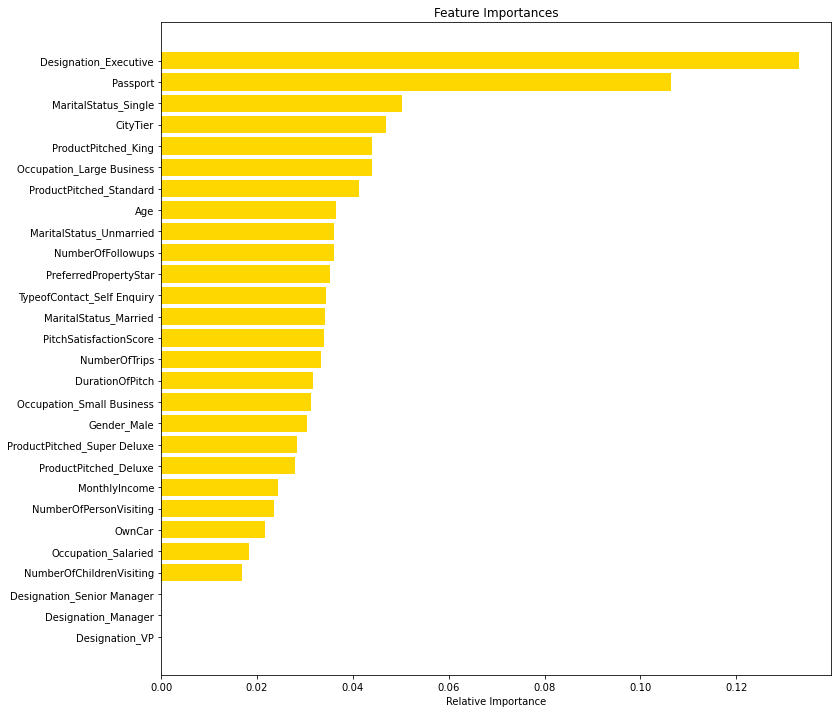

In [121]:
# Let look for the features importance in the model 
importances_rf = xgboost.feature_importances_
indices = np.argsort(importances_rf)
feature_names_rf = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_rf[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names_rf[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Business recommendations 


The variables having the highest impact are based on the best model are designation executive, having a passport, marital status single, tier city, product pitched king or standard, occupation large business, age.     
Some of these variables are mentioned in other models as well or have a clear connection while doing the multivariable analysis (e.g., designation executive).    
The recommendations to the "Visit with us" company to sell their Wellness Tourism Package:    
- Focus on customers with designation executive and occupation large business.      
- Having a passport is a key factor, so the company can offer to handle the passport issuing on behalf of the customer in case they buy the Wellness Tourism Package.     
- The pitch needs to be on the new package Wellness Tourism Package for the customers who preferable may buy king or standard packages. As well as offer the option for a domestic/ local package promotion if they are not interested in international travel. So basically the company is offering two Wellness travel packages.  This is another route to handle the possible passport roadblock.
- City tiers have some type of impact but less, so we can focus more on cities with higher socioeconomic rates. As well the company can charge more.     
- Younger people travel more but have less income, so it's not clear how to approach this. But single customers have a higher chance to buy the package so it's another demographic consideration to factor the targeted customer for the campaign.


